In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams.update({'font.size': 22})
sns.set_style('whitegrid')

In [2]:
IMG_DIR = 'report/img'
def save_pic(name):
    plt.tight_layout()
    plt.savefig(os.path.join(IMG_DIR, name))

In [49]:
interesting_columns = ['person_id', 'person_name', 'year', 'office_id',
           'office_name', 'income_personal', 'income_relatives']

In [50]:
officials_income = pd.read_csv('data/officials_income.csv')
officials_income.head()

,person_id,person_name,income
0,8,Зюганов Геннадий Андреевич,20453218.69
1,9,Алферов Жорес Иванович,81462661.75
2,10,Андреев Андрей Анатольевич,14475607.50
3,12,Афонин Юрий Вячеславович,23774458.69
4,13,Гаврилов Сергей Анатольевич,19608057.29


In [51]:
officials_income.shape

(49032, 3)

In [52]:
outliers = officials_income[
    (
        officials_income.income < officials_income.income.mean() - 3 * officials_income.income.std() 
    ) 
    |
    (
        officials_income.income > officials_income.income.mean() + 3 * officials_income.income.std()
    )
]
outliers.head()

,person_id,person_name,income
21,31,Муравленко Сергей Викторович,1.392346e+09
27,40,Гартунг Валерий Карлович,4.114245e+08
66,83,Петров Сергей Анатольевич,4.985721e+08
78,96,Маркин Эдуард Витальевич,2.426661e+08
84,103,Селезнев Валерий Сергеевич,4.057210e+08


In [53]:
declarations_df_source = pd.read_csv('data/declarations.csv')
declarations_df_source.head()

,person_id,person_name,year,office_id,office_name,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives
0,8,Зюганов Геннадий Андреевич,2009,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2075542.33,102279.19
1,8,Зюганов Геннадий Андреевич,2010,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2126487.00,0.00
2,8,Зюганов Геннадий Андреевич,2010,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2127686.49,168601.94
3,8,Зюганов Геннадий Андреевич,2010,449,Президент Российской Федерации,7,"Федеральный, без региональной структуры",NaN,NaN,7681748.38,349885.97
4,8,Зюганов Геннадий Андреевич,2011,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2177566.64,137656.24


In [54]:
declarations_df_source.shape

(90397, 11)

Remove outliers

In [59]:
declarations_df = declarations_df_source.copy()
declarations_df['income'] = declarations_df_source['income_personal'] + declarations_df_source['income_relatives']

In [60]:
declarations_df = declarations_df[~(
    (
        declarations_df.income < declarations_df.income.mean() - 3 * declarations_df.income.std() 
    ) 
    |
    (
        declarations_df.income > declarations_df.income.mean() + 3 * declarations_df.income.std()
    )
)]
# declarations_df = declarations_df_source[~declarations_df_source.person_id.isin(outliers.person_id)]
declarations_df.shape

(90371, 12)

In [61]:
declarations_df.sample(5)

,person_id,person_name,year,office_id,office_name,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,income
79265,42809,Воротников Игорь Леонидович,2015,6631,"ФГБОУ ВО ""Саратовский Государственный Аграрный...",7,"Федеральный, без региональной структуры",79.0,Саратовская область,1236940.07,61688.83,1298628.90
42686,18956,Захаренко Николай Николаевич,2015,5782,Управление Федеральной налоговой службы Омская...,18,"Региональный, без структуры",69.0,Омская область,913194.30,82539.29,995733.59
18771,6041,Мельшина Анжелика Александровна,2016,1154,Администрация Колпинского района,21,"Организация, без структуры",1.0,Санкт-Петербург,821200.84,250000.00,1071200.84
68464,34770,Якупов Фаттах Максумович,2014,3969,УФСИН Удмуртская республика,7,"Федеральный, без региональной структуры",20.0,Удмуртская республика,1313951.90,331080.12,1645032.02
82633,45249,Фрейвальд Роман Викторович,2016,607,Министерство сельского хозяйства,7,"Федеральный, без региональной структуры",NaN,NaN,345512.57,281375.46,626888.03


In [62]:
declarations_df.shape

(90371, 12)

In [63]:
declarations_df['office_name_sep'] = declarations_df.office_name.apply(lambda x: x.replace(' ', '\n')) # For plotting

In [64]:
office_names = declarations_df[['office_id', 'office_name']].drop_duplicates().reset_index(drop=True)
office_names.index = office_names.office_id
office_names = office_names.drop(['office_id'], axis=1)
office_names

,office_name
office_id,
14,Государственная Дума
449,Президент Российской Федерации
118,Государственное собрание – Курултай Республик...
267,Законодательное собрание Алтайского края
211,Губернатор Иркутской области
1575,Новосибирск - городской округ
258,Мэр города Москвы
5,Совет Федерации
15,Счетная палата


In [65]:
office_names_sep = declarations_df[['office_id', 'office_name_sep']].drop_duplicates().reset_index(drop=True)
office_names_sep.index = office_names_sep.office_id
office_names_sep = office_names_sep.drop(['office_id'], axis=1)
office_names_sep

,office_name_sep
office_id,
14,Государственная\nДума
449,Президент\nРоссийской\nФедерации
118,Государственное\n\nсобрание\n–\nКурултай\nРесп...
267,Законодательное\nсобрание\nАлтайского\nкрая
211,Губернатор\nИркутской\nобласти
1575,Новосибирск\n-\nгородской\nокруг
258,Мэр\nгорода\nМосквы
5,Совет\nФедерации
15,Счетная\nпалата


# Plan
## Meta
* Total declarations
* Declarations by year
* Declarations by office
* Office types

## Basic info 
* Total people
* Total offices
* People distribution by years
* People distribution by office
* People distribution by years by office

## Declared assets
* Income, distributions
    * By year
* Richest people by year
    * Top 10 richest people in each year
* Median incomes by office
* Income vs years worked


# Meta

In [66]:
print(declarations_df.shape)

(90371, 13)


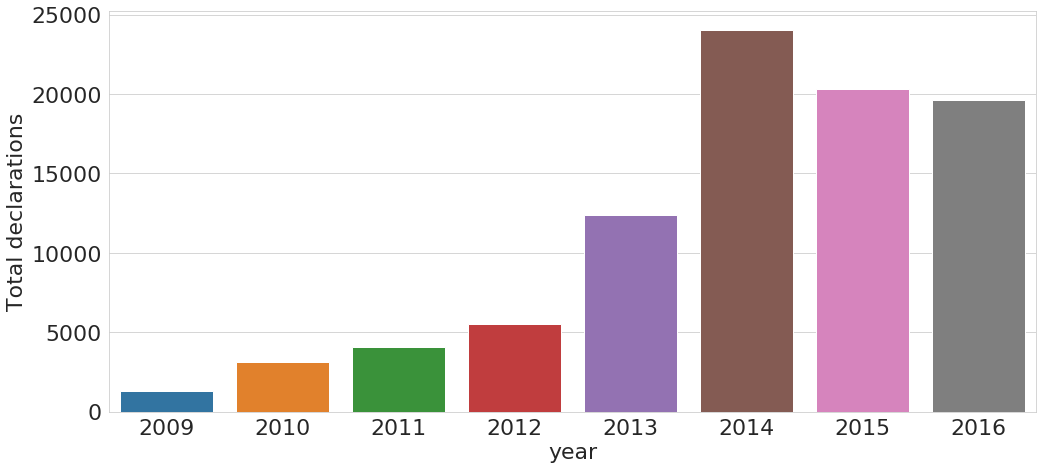

In [67]:
dec_count = declarations_df.groupby(['year'])['person_id'].count()
plt.figure(figsize=(15, 7))
sns.barplot(dec_count.index, dec_count)
plt.ylabel('Total declarations')
save_pic('total_dec')
plt.show()

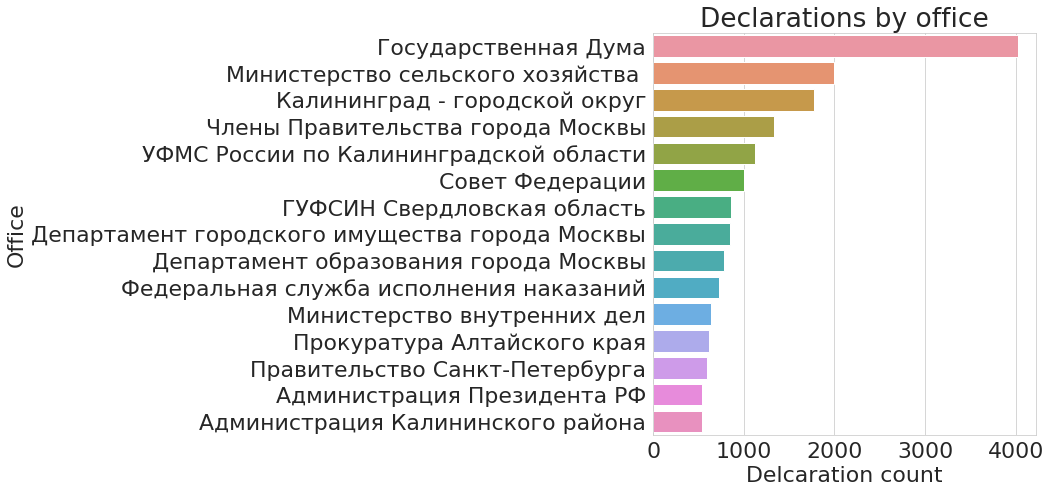

In [68]:
dec_count = declarations_df.groupby(['office_name'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office')
plt.xlabel('Delcaration count')
save_pic('dec_by_office')
plt.title('Declarations by office')
plt.show()

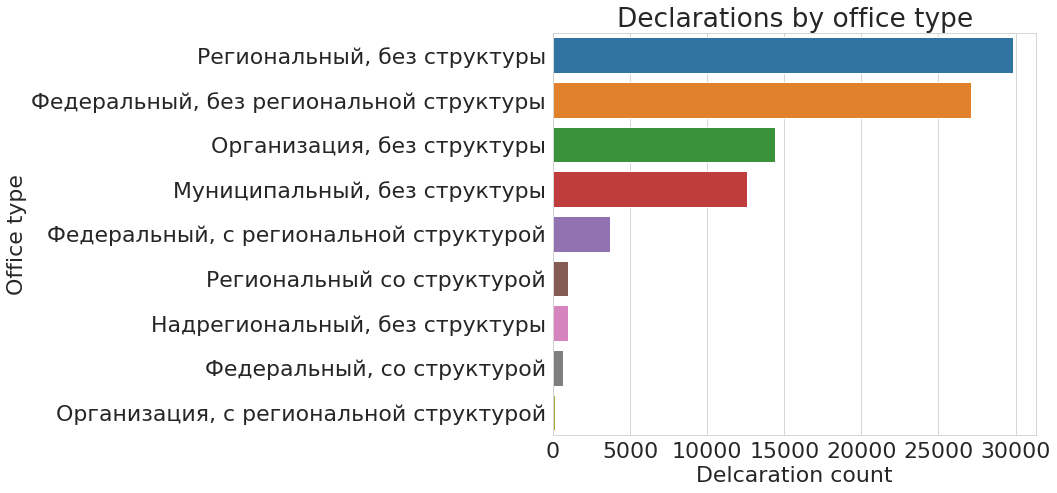

In [69]:
dec_count = declarations_df.groupby(['office_type_name'])['person_id'].count().sort_values(ascending=False)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office type')
plt.xlabel('Delcaration count')
save_pic('dec_by_office_type')
plt.title('Declarations by office type')
plt.show()

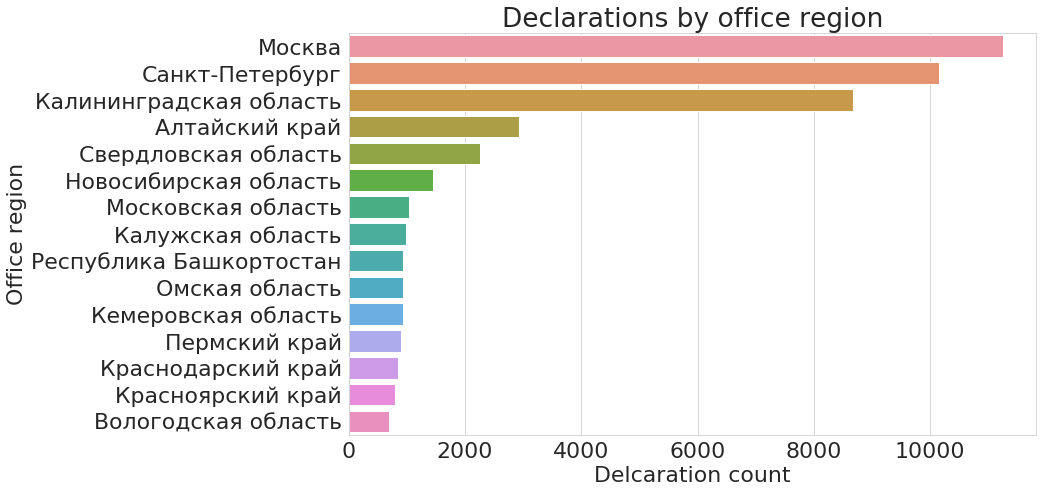

In [70]:
dec_count = declarations_df.groupby(['office_region_name'])['person_id'].count().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 7))
sns.barplot(dec_count, dec_count.index)
plt.ylabel('Office region')
plt.xlabel('Delcaration count')
save_pic('dec_by_office_region')
plt.title('Declarations by office region')
plt.show()

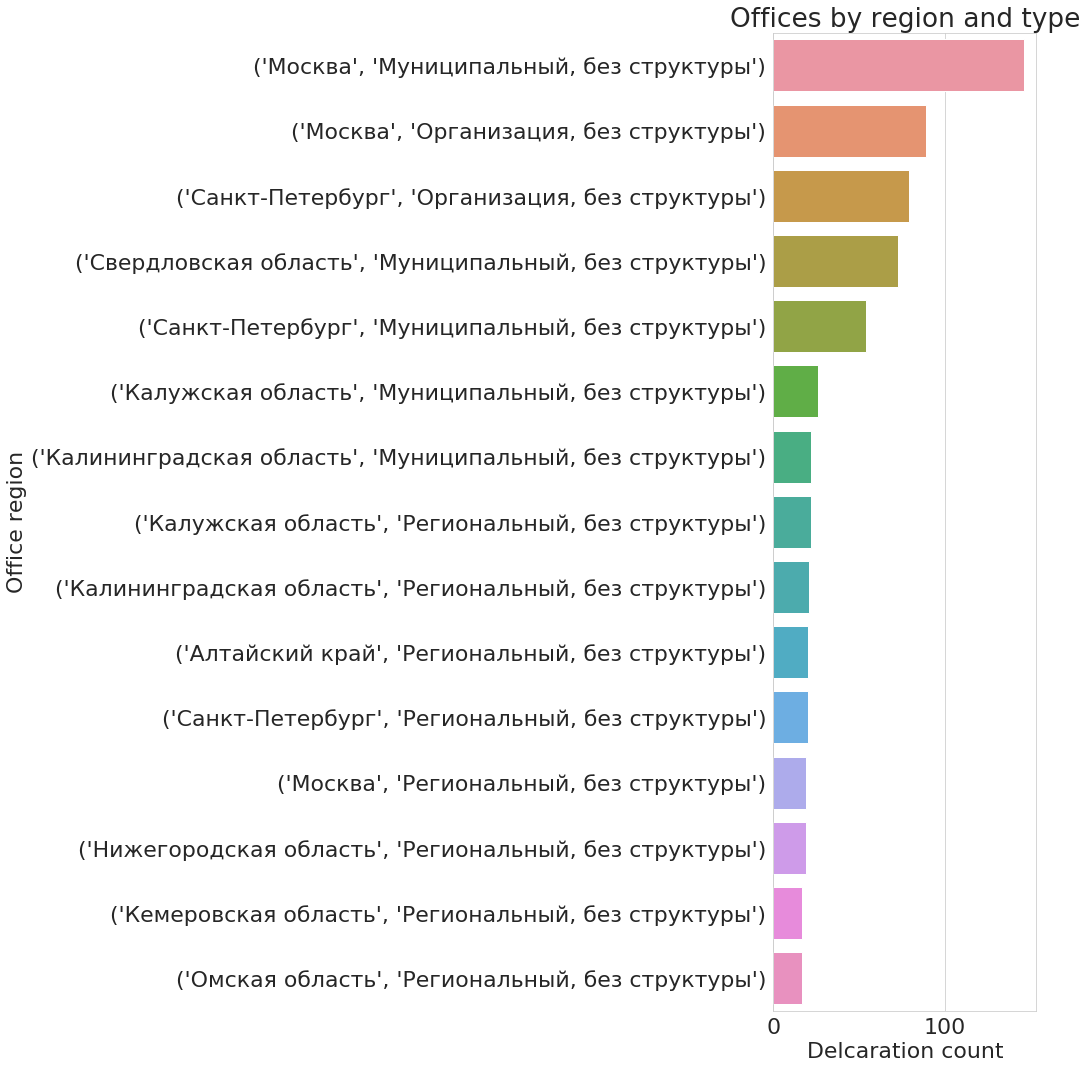

In [71]:
office_count = declarations_df.groupby([ 'office_region_name', 'office_type_name'])['office_id'].nunique().sort_values(ascending=False).head(15)
plt.figure(figsize=(15, 15))
sns.barplot(office_count, office_count.index)
plt.ylabel('Office region')
plt.xlabel('Delcaration count')
save_pic('office_by_region_and_type')
plt.title('Offices by region and type')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


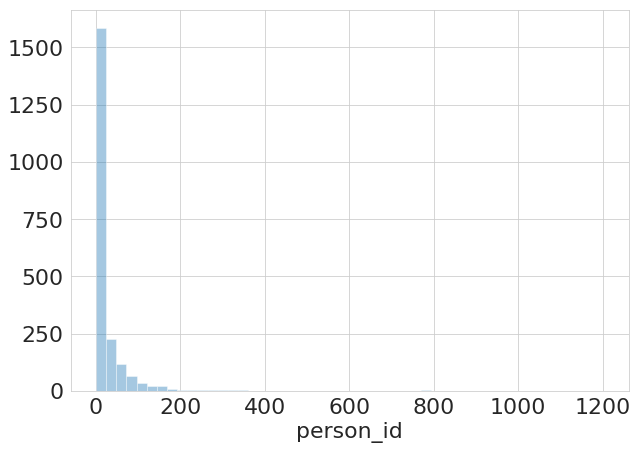

In [72]:
# people by office
people_by_office = declarations_df.groupby(['office_id'])['person_id'].nunique()
plt.figure(figsize=(10, 7))
sns.distplot(people_by_office, kde=False)
plt.show()

In [73]:
# office_count.reset_index()

# People distribution, offices

In [74]:
print('Unique persons', declarations_df.person_id.unique().shape[0])
print('Unique offices', declarations_df.office_id.unique().shape[0])

Unique persons 51853
Unique offices 2104


Top 10 offices by unique people


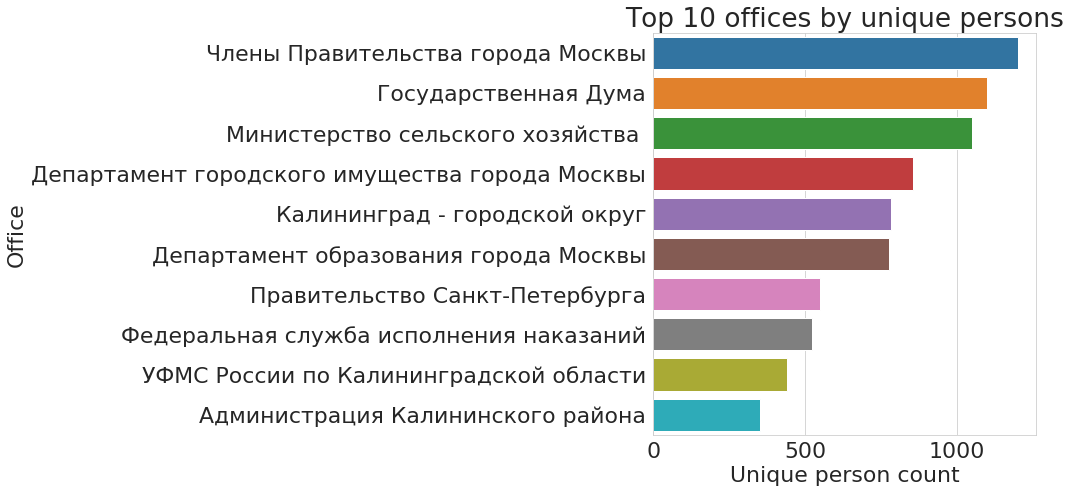

In [75]:
print('Top 10 offices by unique people')
unique_per_office = declarations_df.groupby(['office_id'])['person_id'].nunique().sort_values(ascending=False)

to_plot = unique_per_office.head(10)
plt.figure(figsize=(15, 7))
sns.barplot(y=office_names.loc[to_plot.index].values.flatten(), x=to_plot.values)
plt.ylabel('Office')
plt.xlabel('Unique person count')
save_pic('unique_by_office')
plt.title('Top 10 offices by unique persons')
plt.show()

People per year per office


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


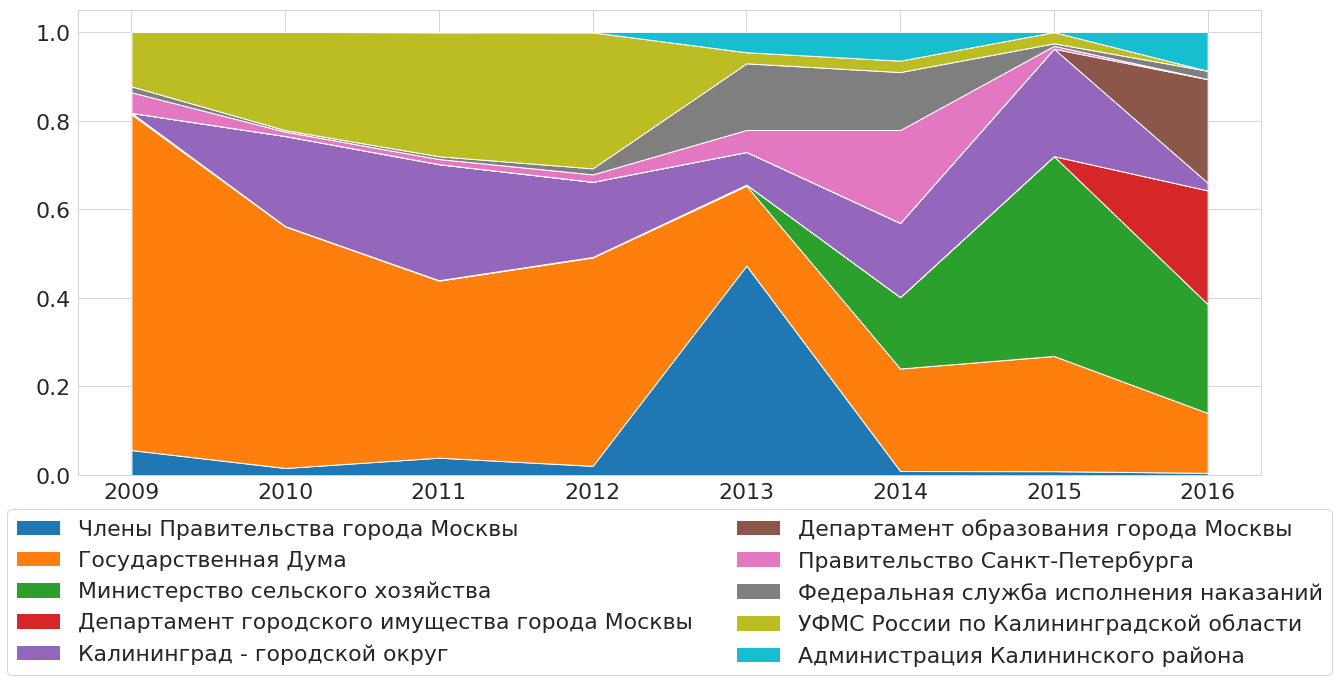

In [76]:
print('People per year per office')

years=sorted(declarations_df.year.unique())

top_offices = np.array(unique_per_office.head(10).index)


grouped = declarations_df.groupby(['office_id', 'year'])['person_id'].nunique()
grouped.head()
y = []
for office in top_offices:
    vals = grouped[office]
    vals = vals.reindex(years, fill_value=0)
    vals.name = office
    y.append(vals)
    
y = pd.DataFrame(y).T
y = y.divide(y.sum(axis=1), axis=0)
labels = office_names.ix[top_offices].values.flatten()
plt.figure(figsize=(20, 10))
plt.stackplot(years,y.T.values, labels=labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
save_pic('unique_by_year_by_office')
plt.show()

# Declared assets

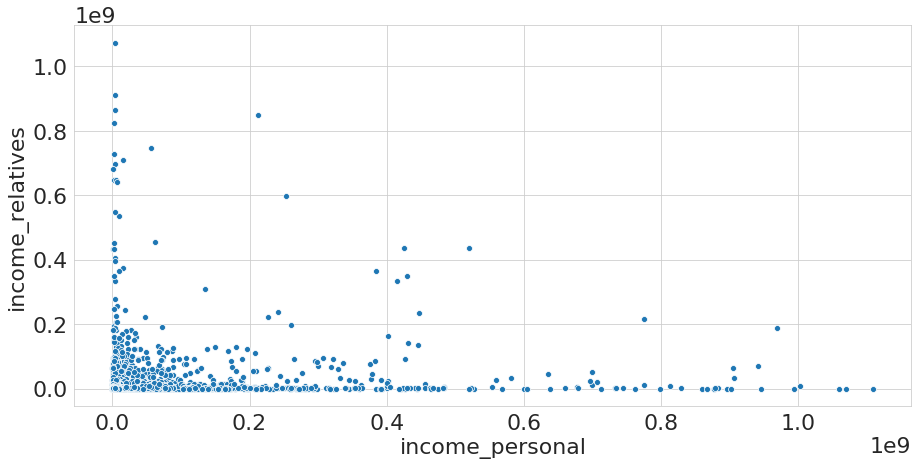

In [77]:
plt.figure(figsize=(15, 7))
sns.scatterplot(declarations_df['income_personal'], declarations_df['income_relatives'])
plt.show()

In [78]:
income_sum = declarations_df.groupby(['person_id'])['income'].sum()
print(income_sum.shape)
income_sum.head()

(51853,)


person_id
8     4.005369e+07
9     1.427950e+08
10    3.131614e+07
11    1.134432e+07
12    6.979880e+07
Name: income, dtype: float64

In [79]:
income_sum = income_sum.sort_values(ascending=False)

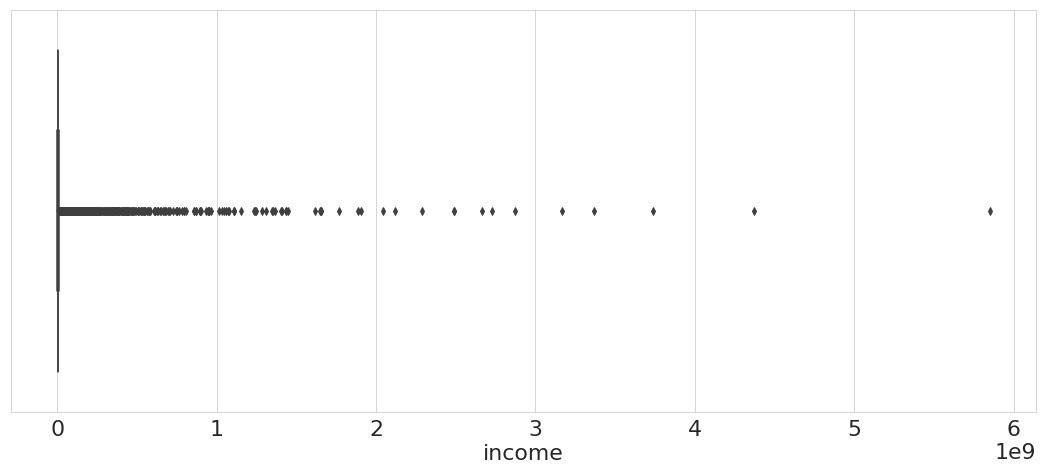

In [80]:
plt.figure(figsize=(15, 7))
sns.boxplot(income_sum)
save_pic('income_boxplot_1')
plt.show()

### Income
* Total income per year
* Median income per year
* Median income per office
* Top offices by median income, per year

In [81]:
yearly_assets_sum = declarations_df.groupby(['year']).sum()
yearly_assets_sum.head()

,person_id,office_id,office_type_id,office_region_id,income_personal,income_relatives,income
year,,,,,,,
2009,14176450,677508,17444,41647.0,8.163356e+09,2.469706e+09,1.063306e+10
2010,24802729,2984171,36733,75896.0,1.822878e+10,5.447922e+09,2.367670e+10
2011,37498012,4876369,58187,146679.0,2.029563e+10,7.066637e+09,2.736227e+10
2012,49386743,6544506,83717,198233.0,2.627630e+10,1.189046e+10,3.816676e+10
2013,223023565,23237205,168458,405529.0,3.907076e+10,1.414636e+10,5.321711e+10


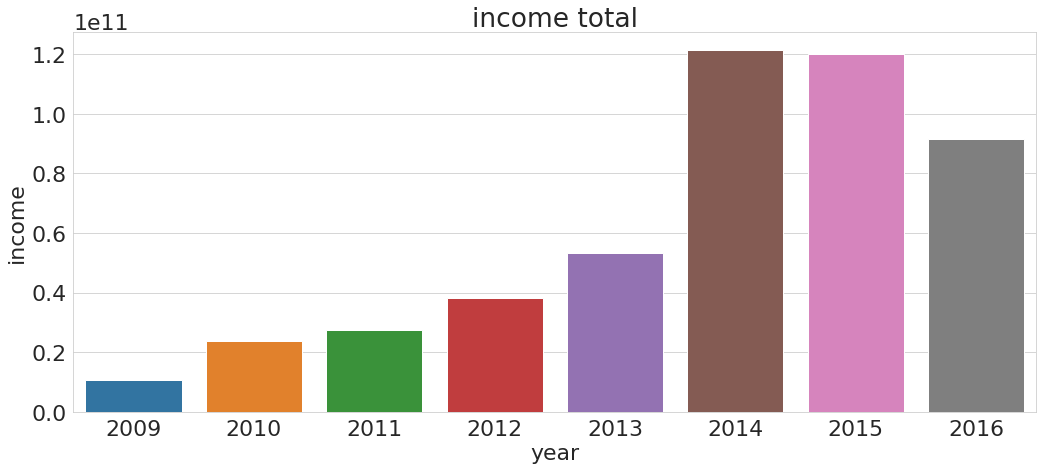

In [82]:
plt.figure(figsize=(15, 7))
plt.title('income total')
sns.barplot(yearly_assets_sum.index, yearly_assets_sum.income)
save_pic('income_by_years')
plt.show()

In [83]:
yearly_assets_median = declarations_df.groupby(['year']).median()
yearly_assets_median.head()

,person_id,office_id,office_type_id,office_region_id,income_personal,income_relatives,income
year,,,,,,,
2009,5380.0,89.0,18.0,53.0,1470126.500,158615.500,1857962.01
2010,2856.5,101.5,7.0,46.0,1441710.000,54150.000,1754103.95
2011,3935.5,560.0,18.0,46.0,1160306.925,151536.875,1497264.50
2012,3945.5,657.0,18.0,46.0,1341263.645,141434.550,1683010.50
2013,11217.0,1156.0,18.0,46.0,1259837.810,192000.000,1633225.23


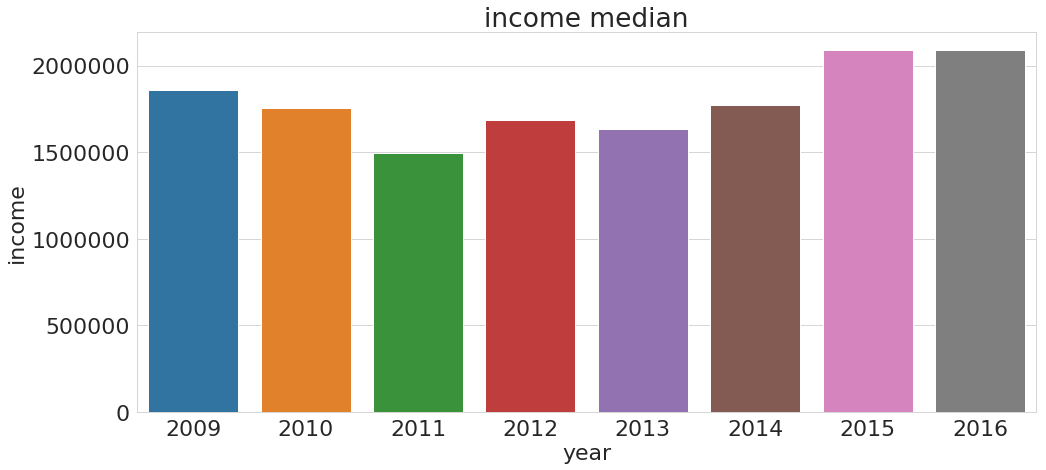

In [84]:
plt.figure(figsize=(15, 7))
plt.title('income median')
sns.barplot(yearly_assets_median.index, yearly_assets_median.income)
save_pic('income_by_years_med')
plt.show()   

In [85]:
office_people_counts = declarations_df.groupby(['office_id'])['person_id'].count().sort_values(ascending=False)
big_offices = office_people_counts[office_people_counts > office_people_counts.quantile(0.75)] # over 35 people in office 
big_offices.shape

(523,)

In [86]:
big_office_declarations = declarations_df[declarations_df.office_id.isin(big_offices.index)]
print(big_office_declarations.shape)
big_office_declarations.head()

(73614, 13)


,person_id,person_name,year,office_id,office_name,office_type_id,office_type_name,office_region_id,office_region_name,income_personal,income_relatives,income,office_name_sep
0,8,Зюганов Геннадий Андреевич,2009,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2075542.33,102279.19,2177821.52,Государственная\nДума
1,8,Зюганов Геннадий Андреевич,2010,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2126487.00,0.00,2126487.00,Государственная\nДума
2,8,Зюганов Геннадий Андреевич,2010,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2127686.49,168601.94,2296288.43,Государственная\nДума
4,8,Зюганов Геннадий Андреевич,2011,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2177566.64,137656.24,2315222.88,Государственная\nДума
5,8,Зюганов Геннадий Андреевич,2012,14,Государственная Дума,7,"Федеральный, без региональной структуры",NaN,NaN,2458749.04,194266.38,2653015.42,Государственная\nДума


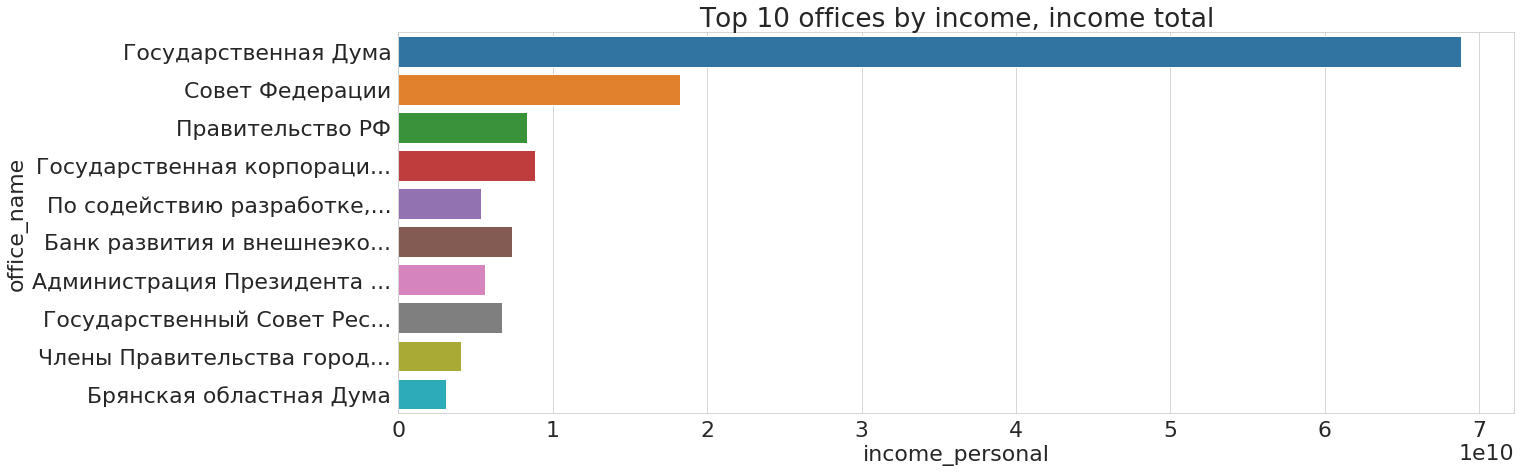

In [87]:
# Total income per office
office_assets_sum = declarations_df.groupby(['office_name']).sum().sort_values(by='income', ascending=False)
office_assets_sum.head()
to_plot = pd.DataFrame(office_assets_sum.head(10).reset_index())
to_plot['office_name'] = to_plot['office_name'].apply(lambda x: x[:25]+'...' if len(x) > 25 else x)
plt.figure(figsize=(20, 7))
plt.title('Top 10 offices by income, income total')
sns.barplot(y=to_plot.office_name, x=to_plot.income_personal)
# save_pic('office_incomes')
plt.show()

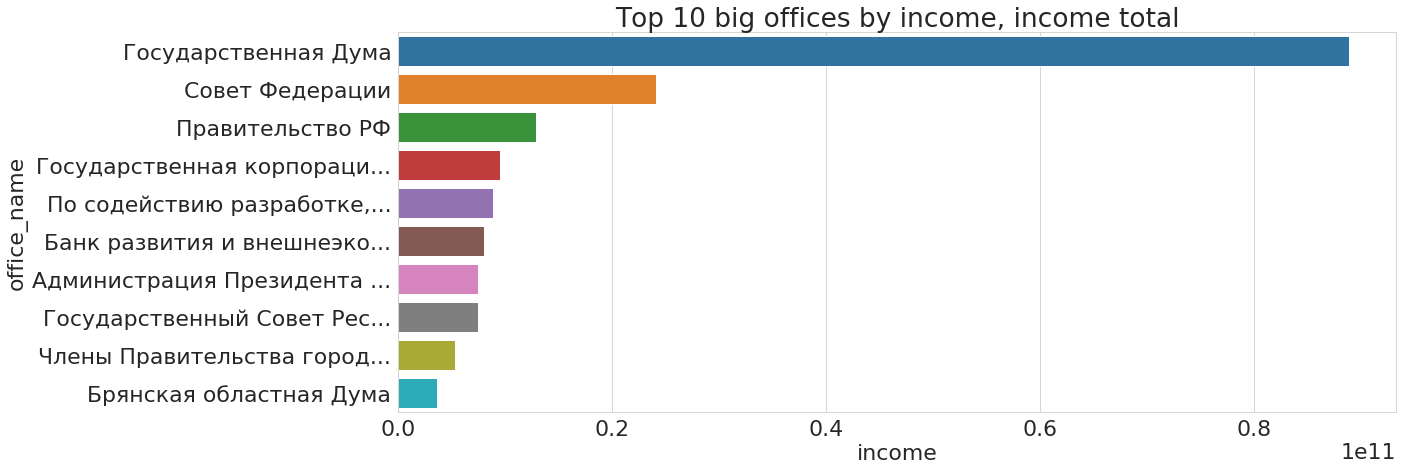

In [88]:
# Total income per office, only big offices
office_assets_sum = big_office_declarations.groupby(['office_name']).sum().sort_values(by='income', ascending=False)
to_plot = pd.DataFrame(office_assets_sum.head(10).reset_index())
to_plot['office_name'] = to_plot['office_name'].apply(lambda x: x[:25]+'...' if len(x) > 25 else x)
plt.figure(figsize=(20, 7))
plt.title('Top 10 big offices by income, income total')
sns.barplot(y=to_plot.office_name, x=to_plot.income)
save_pic('big_office_incomes')
plt.show()

In [89]:
# Median income per office
office_assets_median = big_office_declarations.groupby(['office_name']).median().sort_values(by='income', ascending=False)
office_assets_median.head()

,person_id,year,office_id,office_type_id,office_region_id,income_personal,income_relatives,income
office_name,,,,,,,,
Законодательное Собрание Ямало-Ненецкого автономного округа,15341.0,2015.0,954.0,18.0,104.0,1.835870e+07,946923.350,18989454.68
Центральный Банк,19726.0,2016.0,612.0,7.0,NaN,1.448306e+07,471896.500,15771908.20
Министерство финансов,11670.0,2016.0,604.0,7.0,NaN,1.487759e+07,8472.330,15764996.02
"Государственная корпорация по атомной энергии ""Росатом""",38411.0,2014.0,969.0,21.0,NaN,1.380369e+07,344301.340,15162543.02
Банк развития и внешнеэкономической деятельности (Внешэкономбанк),32297.5,2014.0,966.0,21.0,NaN,1.122073e+07,33052.425,12522960.94


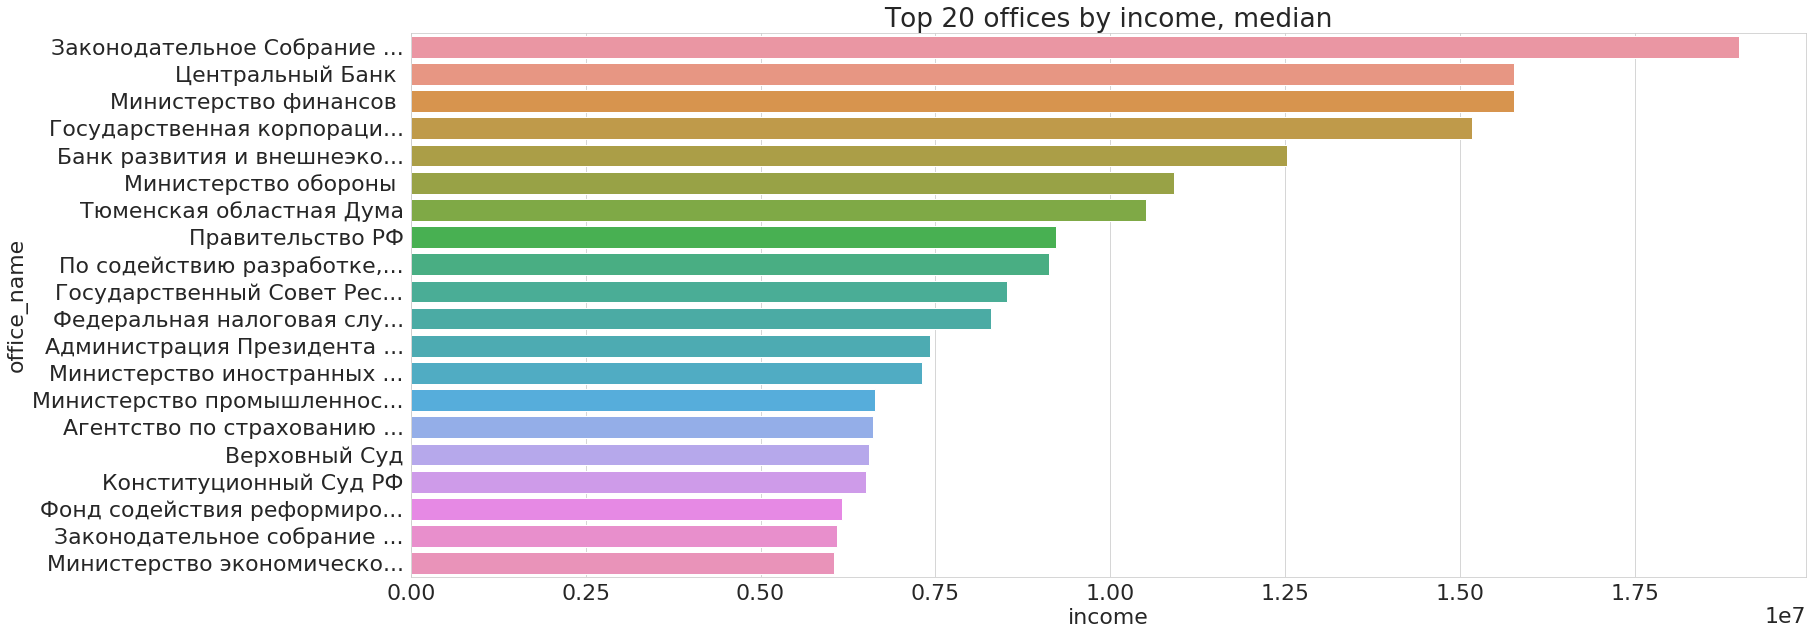

In [90]:
to_plot = office_assets_median.reset_index().head(20)
to_plot['office_name'] = to_plot.office_name.apply(lambda x: x[:25]+'...' if len(x) > 25 else x)
plt.figure(figsize=(25, 10))
plt.title('Top 20 offices by income, median')
sns.barplot(y=to_plot.office_name, x=to_plot.income)
plt.show()

Income per year per office


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


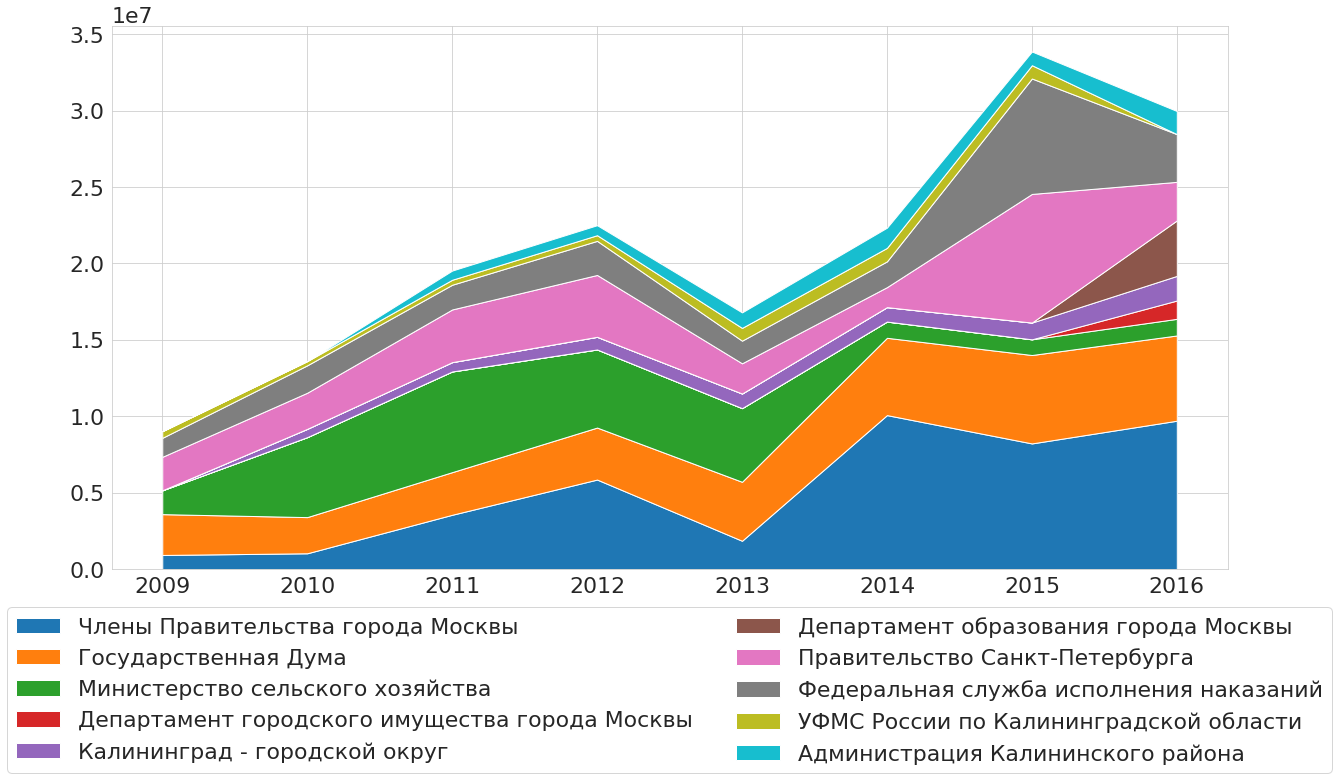

In [91]:
print('Income per year per office')

years=sorted(declarations_df.year.unique())

top_offices = np.array(unique_per_office.head(10).index)


grouped = declarations_df.groupby(['office_id', 'year'])['income'].median()
grouped.head()
# Incomes per year per office
y = []
for office in top_offices:
    vals = grouped[office]
    vals = vals.reindex(years, fill_value=0)
    vals.name = office
    y.append(vals)
    
labels = office_names.ix[top_offices].values.flatten()
plt.figure(figsize=(20, 10))
plt.stackplot(years,y, labels=labels)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()

In [92]:
grouped.head()
g = grouped.reset_index()
g = g[g.office_id.isin(top_offices)]
g['office_name'] = office_names.ix[g.office_id].values.flatten()
g.head()

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,office_id,year,income,office_name
56,14,2009,2669802.50,Государственная Дума
57,14,2010,2366050.17,Государственная Дума
58,14,2011,2788614.37,Государственная Дума
59,14,2012,3401201.53,Государственная Дума
60,14,2013,3856880.71,Государственная Дума


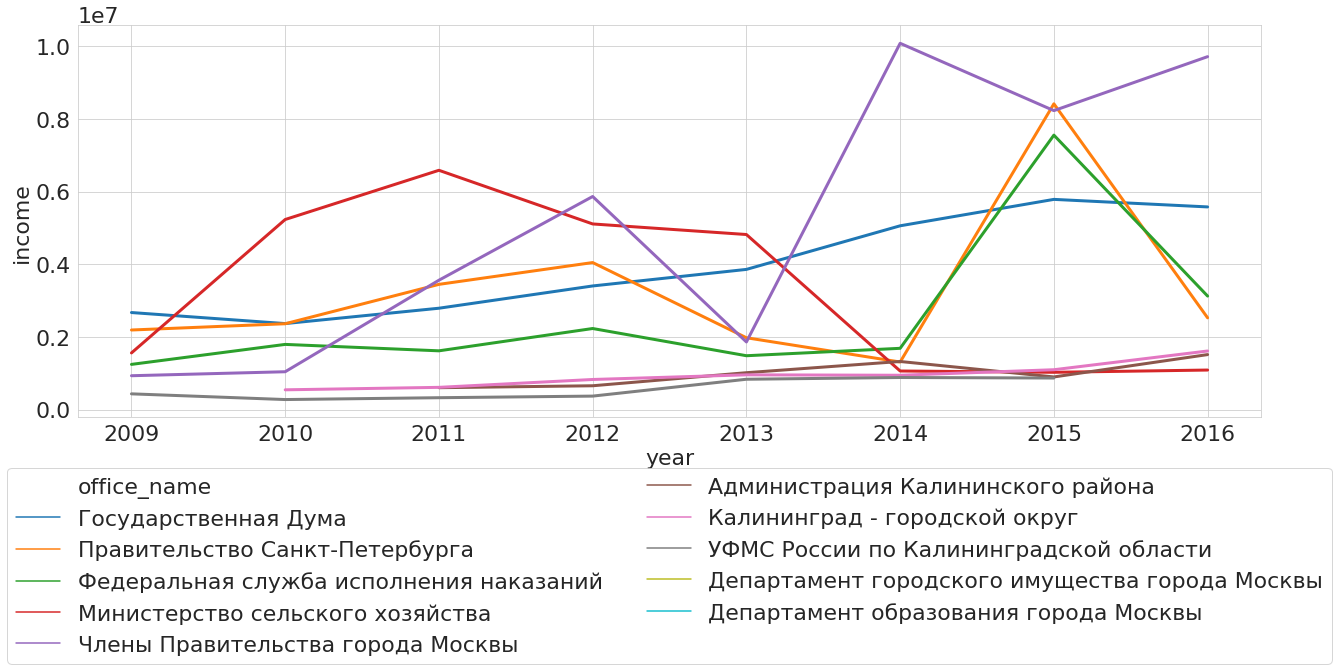

In [93]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y='income', hue='office_name', data=g, lw=3, markers=True, estimator=None)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
save_pic('income_by_year_by_office_med')
plt.show()

In [94]:
# Median income per office in 2016
# office_assets_median = big_office_declarations[big_office_declarations.year == 2016].groupby(['office_name']).median().sort_values(by='income', ascending=False)
# office_assets_median.head()
# to_plot = office_assets_median.head(10)
# plt.figure(figsize=(20, 7))
# plt.title('Top 10 offices by income, median, 2016')
# sns.barplot(to_plot.index, to_plot.income)
# plt.show()

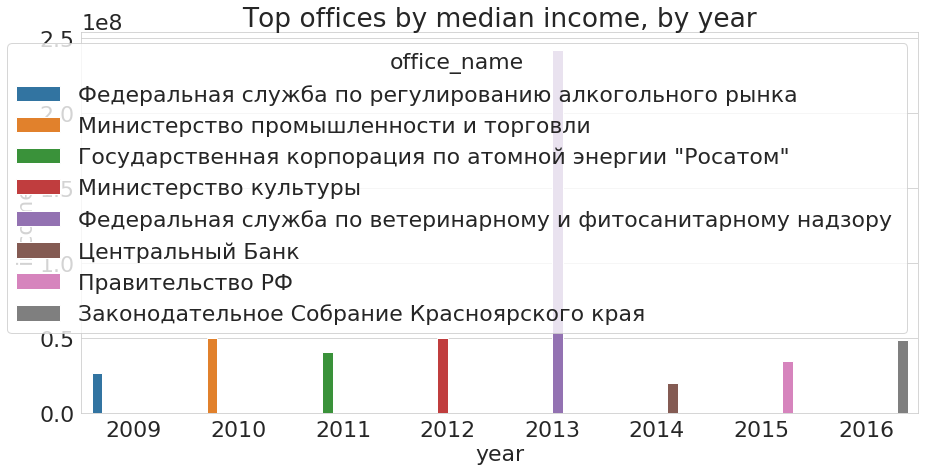

In [95]:
# Top offices by median income, by year
tdf= big_office_declarations.groupby(['year', 'office_name'])['income'].median().reset_index()
tdf2 = tdf.groupby('year')['income'].max().reset_index()
tdf_final = tdf.merge(tdf2, on=['year', 'income'], how='inner')
tdf_final.office_name = tdf_final.office_name.apply(lambda x: x.replace('\n', ' '))
plt.figure(figsize=(15,7))
plt.title('Top offices by median income, by year')
sns.barplot(x='year', y='income', hue='office_name', data=tdf_final)
plt.show()

### Income distributions
* Income percentile distributions

In [96]:
percentiles = [0, 0.75, 0.95, 0.99, 0.9999, 1]
labels = ['p'+str(percentiles[i-1]) +' - ' +str(percentiles[i]) for i in range(1, len(percentiles))]
qcut, bins = pd.qcut(income_sum, percentiles, labels=labels, retbins=True)

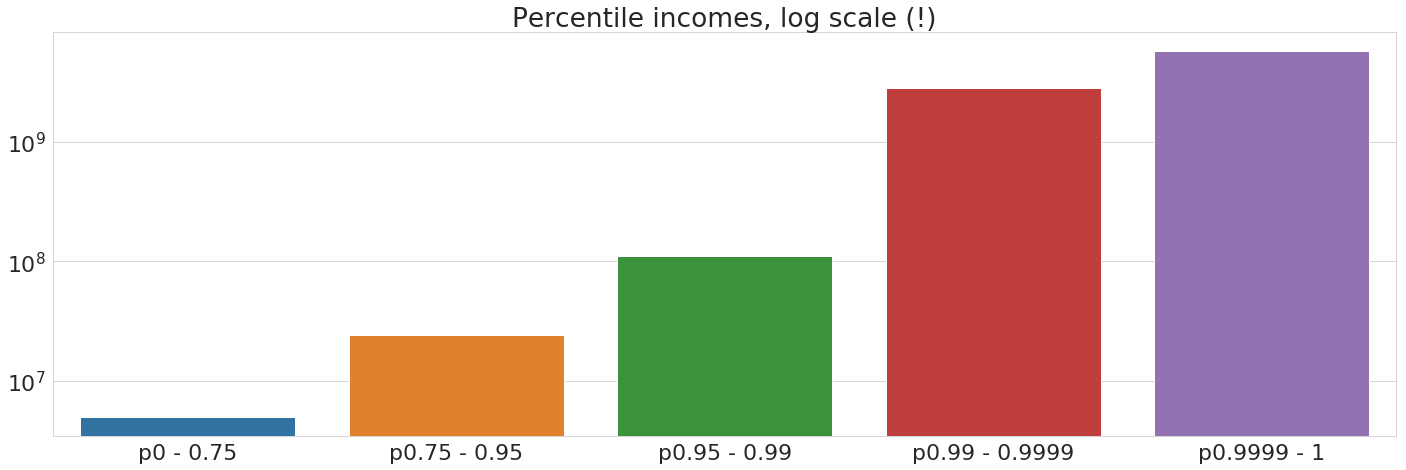

In [97]:
plt.figure(figsize=(20, 7))
plt.title('Percentile incomes, log scale (!)')
sns.barplot(labels, bins[1:])
plt.yscale('log')
save_pic('perc_inc_log')
plt.show()

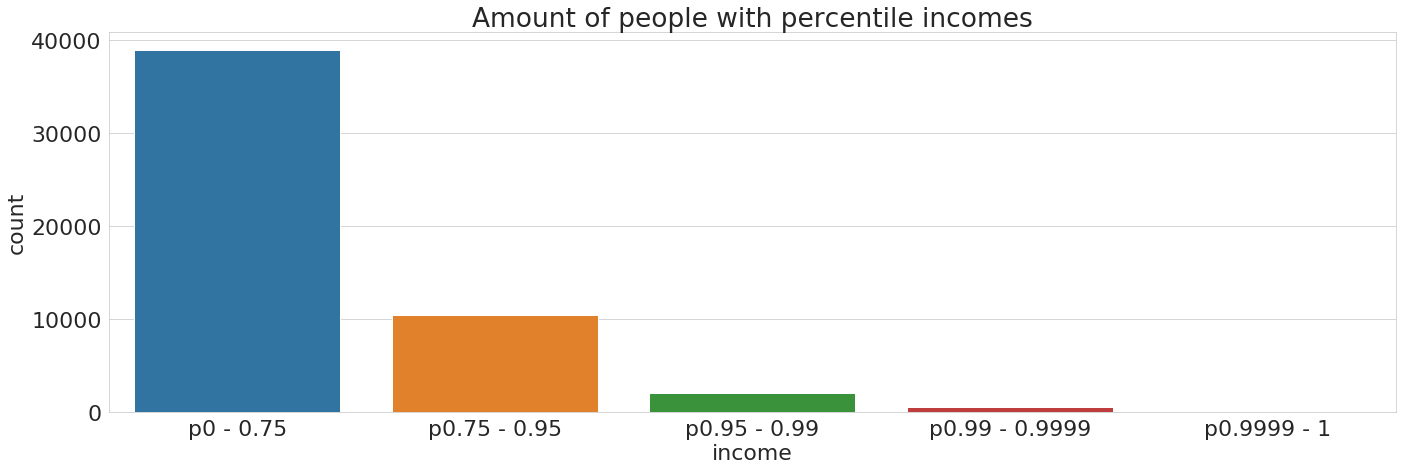

In [98]:
plt.figure(figsize=(20, 7))
plt.title('Amount of people with percentile incomes')
sns.countplot(qcut)
save_pic('perc_am_log')
plt.show()

Total income


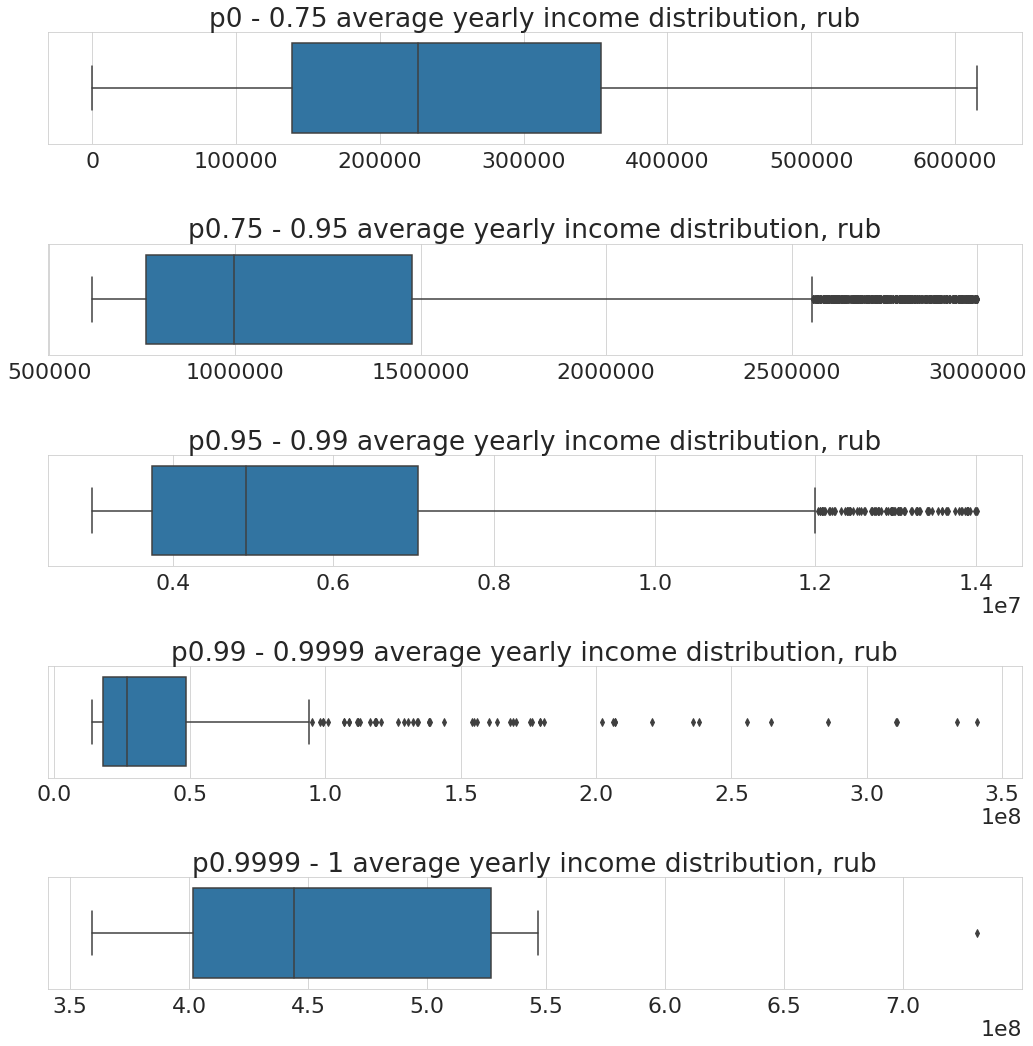

In [99]:
print('Total income')
income_yearly = income_sum / len(years)

plt.figure(figsize=(15, 15))

for i, percentile in enumerate(labels):
    plt.subplot(len(labels), 1, i+1)
    percentile_persons = qcut[qcut == percentile].index
    
    percentile_income = income_yearly.loc[percentile_persons]
    
    plt.title(percentile +' average yearly income distribution, rub')
    millions_xlabel = False
    sns.boxplot(percentile_income, orient='h')
    plt.xlabel('')
save_pic('boxplots_perc')
plt.show()

Total income


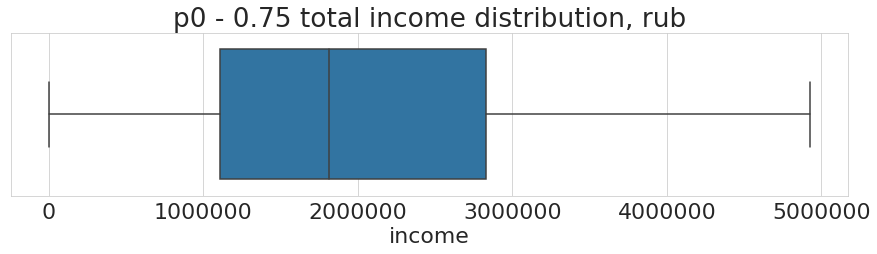

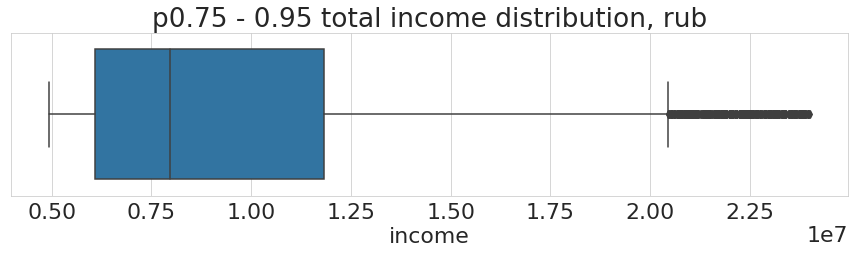

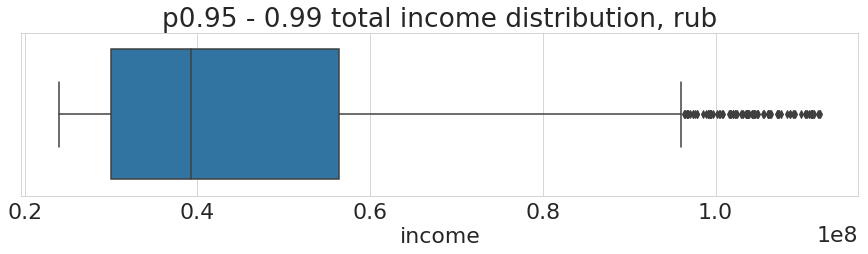

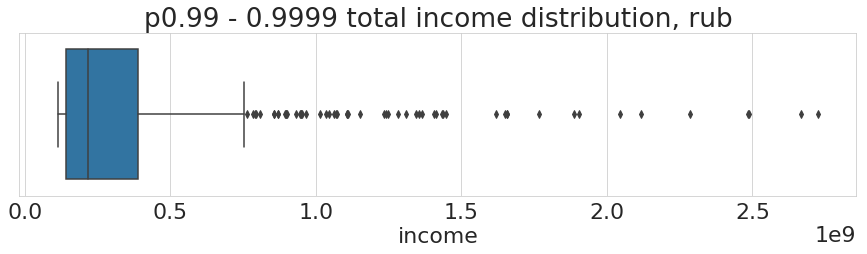

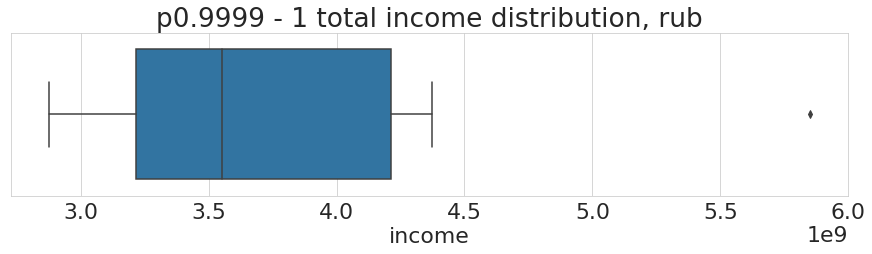

In [100]:
print('Total income')
for percentile in labels:
    percentile_persons = qcut[qcut == percentile].index
    
    percentile_income = income_sum.loc[percentile_persons]
    
    plt.figure(figsize=(15, 3))
    plt.title(percentile +' total income distribution, rub')
    millions_xlabel = False
    sns.boxplot(percentile_income)
    plt.show()

In [101]:
final_df = pd.DataFrame(index=range(1, 11))
for year in declarations_df.year.unique():
    tdf = declarations_df[declarations_df.year == year].groupby(['person_name'])['income'].sum().sort_values(ascending=False)
    top_10 = list(tdf.head(10).index)
    final_df[year] = top_10

print('Top 10 people by income, each year')
final_df

Top 10 people by income, each year


,2009,2010,2011,2012,2013,2014,2015,2016
1,Аникеев Григорий Викторович,Аникеев Григорий Викторович,Малкин Виталий Борисович,Борцов Николай Иванович,Груздев Владимир Сергеевич,Аникеев Григорий Викторович,Дерев Эдуард Вячеславович,Чемезов Сергей Викторович
2,Борцов Николай Иванович,Резник Владислав Матусович,Хлопонин Александр Геннадиевич,Аникеев Григорий Викторович,Дарькин Сергей Михайлович,Соколов Михаил Юрьевич,Пономарев Валерий Андреевич,Богомаз Александр Васильевич
3,Гребенкин Олег Анатольевич,Дарькин Сергей Михайлович,Милявский Александр Борисович,Ананьев Дмитрий Николаевич,Чемезов Сергей Викторович,Зотов Владимир Федорович,Евтушок Игорь Петрович,Рассудов Александр Николаевич
4,Комаров Фоат Фагимович,Муравленко Сергей Викторович,Слипенчук Михаил Викторович,Каланда Владимир Александрович,Симановский Леонид Яковлевич,Слипенчук Михаил Викторович,Шутов Андрей Васильевич,Палкин Андрей Васильевич
5,Шувалов Игорь Иванович,Медведев Евгений Николаевич,Мошкович Вадим Николаевич,Гурьев Андрей Григорьевич,Борцов Николай Иванович,Некрасов Александр Николаевич,Симановский Леонид Яковлевич,Некрасов Александр Николаевич
6,Волков Юрий Николаевич,Гребенкин Олег Анатольевич,Зубицкий Борис Давыдович,Петров Сергей Анатольевич,Шувалов Игорь Иванович,Вайнштейн Сергей Евгеньевич,Богомаз Александр Васильевич,Кузнецов Лев Владимирович
7,Зубицкий Борис Давыдович,Симановский Леонид Яковлевич,Резник Владислав Матусович,Саблин Дмитрий Вадимович,Богомаз Александр Васильевич,Басанский Александр Александрович,Симонов Владимир Федорович,Борцов Николай Иванович
8,Володин Вячеслав Викторович,Груздев Владимир Сергеевич,Пичугов Виктор Александрович,Пичугов Виктор Александрович,Пичугов Виктор Александрович,Скворцов Сергей Викторович,Борцов Николай Иванович,Седых Марина Владимировна
9,Зеленин Дмитрий Вадимович,Шувалов Игорь Иванович,Каланда Владимир Александрович,Чемезов Сергей Викторович,Пономарев Валерий Андреевич,Фахрутдинов Альберт Шамилович,Сафонов Олег Петрович,Аникеев Григорий Викторович
10,Лебедев Игорь Владимирович,Хайруллин Айрат Назипович,Черёмин Сергей Евгеньевич,Кононов Владимир Михайлович,Муравленко Сергей Викторович,Куликов Сергей Александрович,Кретов Александр Владимирович,Абызов Михаил Анатольевич


In [102]:
years_worked = declarations_df.groupby(['person_id'])['year'].nunique()
years_worked.name = 'years worked'
years_worked.head()

person_id
8     8
9     8
10    7
11    4
12    8
Name: years worked, dtype: int64

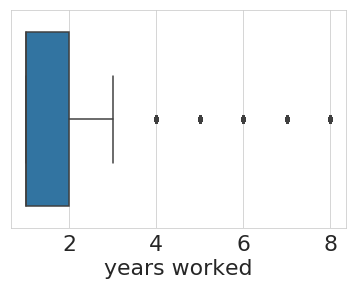

In [103]:
plt.figure()
sns.boxplot(years_worked)
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


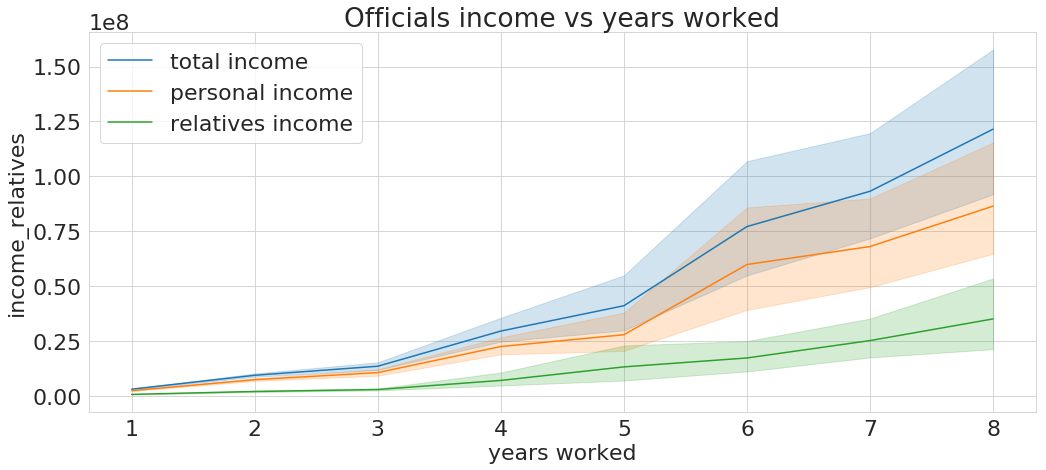

In [104]:
income_df = declarations_df.groupby(['person_id'])['income', 'income_personal', 'income_relatives'].sum()
income_df = income_df.loc[years_worked.index]
plt.figure(figsize=(15, 7))
plt.title('Officials income vs years worked')
sns.lineplot(years_worked, income_df.income, label ='total income')
sns.lineplot(years_worked, income_df.income_personal, label='personal income')
sns.lineplot(years_worked, income_df.income_relatives, label='relatives income')
save_pic('income_vs_years')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


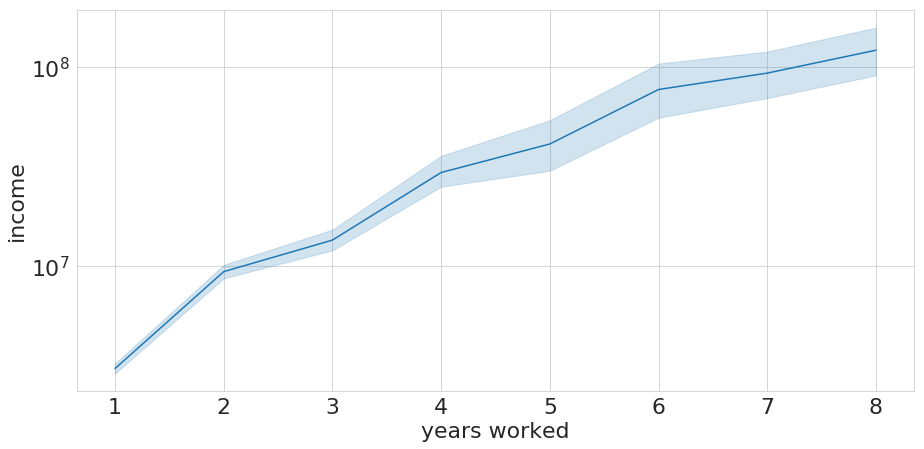

In [107]:
# We can observe a log dependency
plt.figure(figsize=(15, 7))
sns.lineplot(years_worked, income_df.income)
plt.yscale('log')
plt.show()

In [108]:
print('Median', income_df.median())

print('Std', income_df.std())


Median income              2435904.3
income_personal     1891809.0
income_relatives     283100.6
dtype: float64
Std income              6.925651e+07
income_personal     5.752585e+07
income_relatives    2.903792e+07
dtype: float64
